# Lab6

In [1]:
pip install jupyter-ai~=1.0 # Because I am using JupyterLab V3, I need to use Jupyter-ai V1.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [6]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [7]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [8]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [9]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [10]:
sql = """
  select * from name inner join income on name.fips = income.fips
     """

In [11]:
import pandas as pd

In [12]:
df = pd.read_sql(sql, con=conn)
df.head()

,fips,name,fips,income,year
0,01,Alabama,01,36879,2005
1,02,Alaska,02,56234,2005
2,04,Arizona,04,44282,2005
3,05,Arkansas,05,34999,2005
4,06,California,06,53629,2005


In [13]:
%%ai gpt4
what is in the {df} in (In[29])

The information appears to be a dataset or data frame containing information about different US states. It contains 780 rows and 5 columns. 

The columns are:
1. `fips`: Federal Information Processing Standards code, which is a unique code to identify US states.
2. `name`: Name of the US state corresponding to the FIPS code.
3. `fips`: The column is repeated.
4. `income`: The income in the state for the corresponding year.
5. `year`: The year for which the income data is reported.

The data ranges from the year 2005 to 2019 and covers various states like Alabama, Alaska, Arizona, Arkansas, California, Colorado, Delaware, and District of Columbia. The income data also varies across states and years. For example, the income in Alabama in 2005 was 36879, while in 2019 the income in District of Columbia was 92266. 

There seems to be a mistake in the table as the `fips` column is repeated. It should be checked and corrected.

In [14]:
%%ai gpt4 -f code

calculate the year over year income growth rate for each state in the {df}
show the resilts on a line chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data frame is named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate the year-over-year income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Plot the income growth rate for each state over time
for state in df['name'].unique():
    state_df = df[df['name'] == state]
    plt.plot(state_df['year'], state_df['income_growth_rate'], label=state)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Income Growth Rate')
plt.title('Year-over-Year Income Growth Rate by State')
plt.show()
```
Please note that this will only work if the data for each state and each year is available, and the data is sorted by state and year. If not, you may need to preprocess the data before calculating the growth rate and plotting.

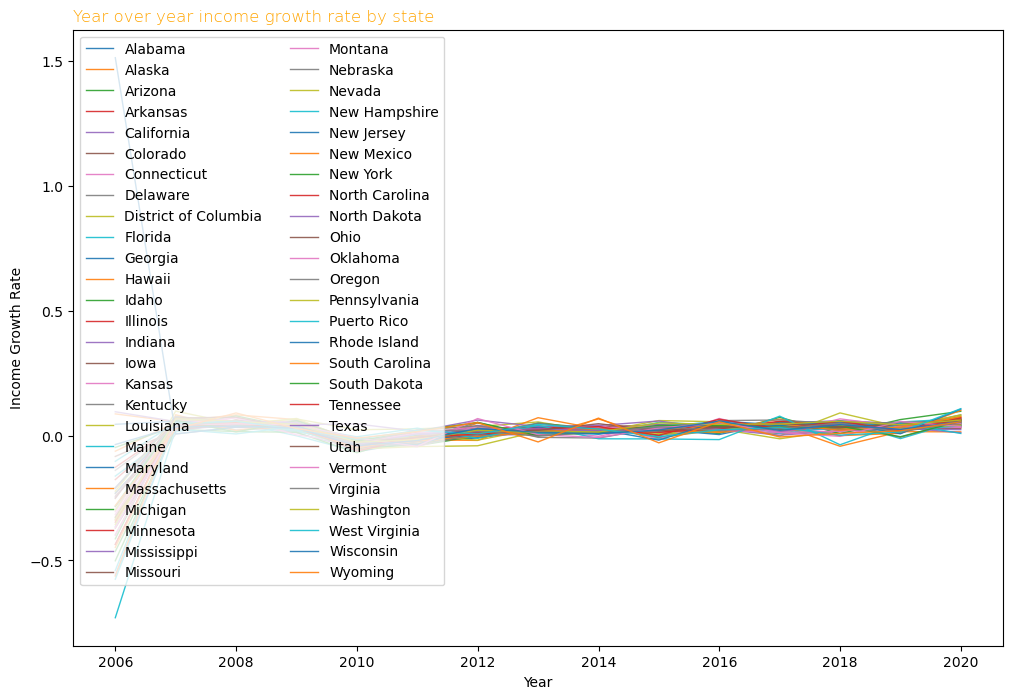

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'

df['year'] = pd.to_datetime(df['year'], format='%Y') # Convert 'year' column to datetime
df.set_index('year', inplace=True) # Set 'year' as the index

# Group by 'name' and resample annually to calculate the annual income growth rate
df_grouped = df.groupby('name')['income'].resample('A').sum().pct_change()

# Reset index
df_grouped = df_grouped.reset_index()

# Pivot the data for the line chart
df_pivot = df_grouped.pivot(index='year', columns='name', values='income')

# Plot
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)
plt.title("Year over year income growth rate by state", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Income Growth Rate")
plt.show()

In [16]:
%%ai gpt4
explain the code in {In[15]}

This Python script uses the `pandas` and `matplotlib.pyplot` libraries to calculate and visualize the year-over-year income growth rate for each state in a given DataFrame, 'df'. Here's what each part of the script does:

1. `import pandas as pd` and `import matplotlib.pyplot as plt`: These lines import the necessary libraries. Pandas is a data manipulation library and Matplotlib is a data visualization library.

2. `df['year'] = pd.to_datetime(df['year'], format='%Y')`: This line converts the 'year' column in the dataframe to datetime format, which allows for time-based operations.

3. `df.set_index('year', inplace=True)`: This sets 'year' as the index of the dataframe.

4. `df_grouped = df.groupby('name')['income'].resample('A').sum().pct_change()`: This line groups the dataframe by 'name' (state), resamples the data on an annual basis (with 'A'), calculates the sum of 'income' for each year, and then calculates the percentage change from year to year.

5. `df_grouped = df_grouped.reset_index()`: This resets the index of the grouped dataframe.

6. `df_pivot = df_grouped.pivot(index='year', columns='name', values='income')`: This pivots the dataframe to have years as rows, names as columns, and income growth rates as cell values.

7. The next block of code plots the data. It creates a line for each state, with the x-axis as the year and the y-axis as the income growth rate. The `plt.legend`, `plt.title`, `plt.xlabel`, and `plt.ylabel` functions are used to add a legend, title, and labels to the plot. 

8. `plt.show()`: Finally, this line displays the plot.

In [17]:
%%ai gpt4 -f code
Calculate the year-over-year income growth rate in {df} 
and visualize it on a bar chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data frame is named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate the year-over-year income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Group by 'name' and calculate the average income growth rate
df_grouped = df.groupby('name')['income_growth_rate'].mean().reset_index()

# Plot the average income growth rate for each state
plt.bar(df_grouped['name'], df_grouped['income_growth_rate'])
plt.xlabel('State')
plt.ylabel('Average Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.xticks(rotation=90)
plt.show()
```
This code assumes that the data for each state and each year is available and sorted correctly. If not, you may need to preprocess the data before calculating the growth rate and plotting.

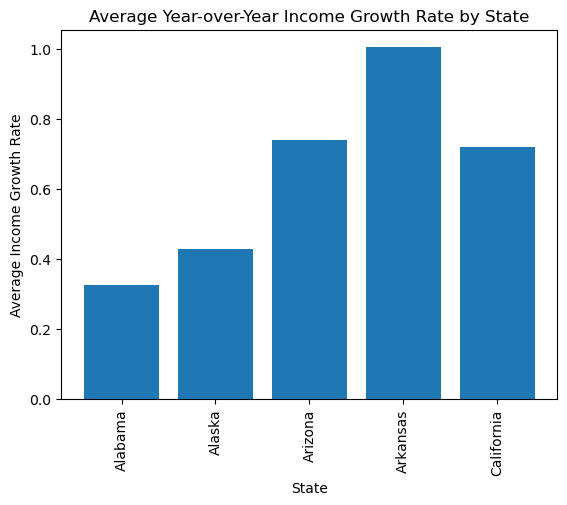

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data frame is named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate the year-over-year income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Group by 'name' and calculate the average income growth rate
df_grouped = df.groupby('name')['income_growth_rate'].mean().reset_index()

# Plot the average income growth rate for each state
plt.bar(df_grouped['name'], df_grouped['income_growth_rate'])
plt.xlabel('State')
plt.ylabel('Average Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.xticks(rotation=90)
plt.show()

In [19]:
%%ai gpt4 -f code
We have a view named name_income in an SQL database
you don't need to redefine the connection string
use the {conn} defined in {In[3]} to load all the recored into pandas dataframe 

In [21]:
%%ai gpt4 -f code
We have a view named name_income in an SQL database
you don't need to redefine the connection string
use the {conn} defined in {In[6]} to load all the recored into pandas dataframe 

In [22]:
import pandas as pd
import psycopg2

query = "SELECT * FROM name_income"
df = pd.read_sql(query, conn)

In [23]:
%%ai gpt4 
What is the information in {df}

The given data is a DataFrame with 780 rows and 2 columns. Each row represents a record. The 'name' column contains the names of various regions, which appear to be US states, and the 'income' column contains the corresponding income for each region. 

The DataFrame includes data for regions such as Alabama, Alaska, Arizona, Arkansas, and California, among others. The 'income' values vary widely: for example, the income for Alabama is 36,879, while the income for the District of Columbia is 92,266.

In [24]:
%%ai gpt4 -f code
Calculate the average year-over-year income growth rate for each state in {df} 
and create a chart to show the result

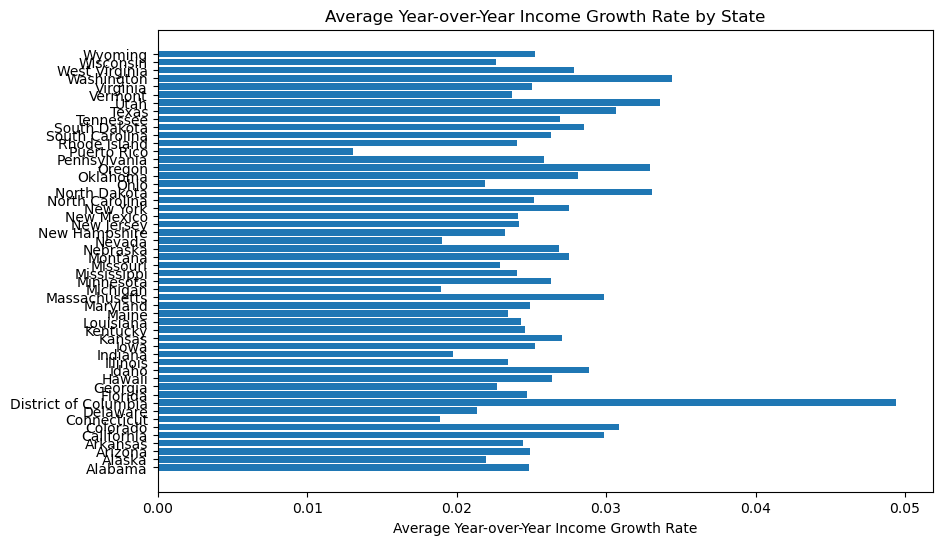

In [25]:
import matplotlib.pyplot as plt

# Assuming that the data is sorted by year and the same state appears in each year
df['income_shift'] = df.groupby(['name'])['income'].shift(1)
df['growth_rate'] = (df['income'] - df['income_shift']) / df['income_shift']

# Calculate average growth rate for each state
avg_growth_rate = df.groupby('name')['growth_rate'].mean().reset_index()

# Create a bar chart to show the result
plt.figure(figsize=(10,6))
plt.barh(avg_growth_rate['name'], avg_growth_rate['growth_rate'])
plt.xlabel('Average Year-over-Year Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.show()